# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import requests
from pprint import pprint
from scipy.stats import linregress
import matplotlib.pyplot as plt
from citipy import citipy

# Google API Key and Weather key
from api_keys import g_key
from api_keys import weather_api_key

In [2]:
#Weather url, units of weather fahrenheit, longitude and latitude to be randomly selected from any city in the world
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
lat_range = (-90, 90)
long_range = (-180, 180)
query_url = f"{url}appid={weather_api_key}&units={units}&q="

## Generate Cities List

In [3]:
# get list of cities with long. and lat.
lat_longs = []
cities = []

#create random list of cities with long. and lat.
lat = np.random.uniform(low=-90.0, high=90, size=1500)
long = np.random.uniform(low=-180, high=180, size=1500)
lat_longs = zip(lat, long)

#identify cities in lat_long
for lat_long in lat_longs:
    city = citipy.nearest_city(lat_long[0], lat_long[1]).city_name

    if city not in cities:
        cities.append(city)

#print number of cities
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# list of variables 
city_2 = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
longs = []
lats = []


#set initial count for organization
count = 0
set_one = 1

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ", "&")).json()
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        longs.append(response['coord']['lon'])
        lats.append(response['coord']['lat'])
        if count > 48:
            count = 1
            set_one += 1
            city_2.append(city)

        else:
            count += 1
            city_2.append(city)
        print(f"Processing record {count} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping.....")
print("------------ \nData Retreival Complete\n--------")


uktoyaktuk
Processing record 7 of Set 3 | margate
Processing record 8 of Set 3 | alofi
Processing record 9 of Set 3 | praia
Processing record 10 of Set 3 | faanui
Processing record 11 of Set 3 | san patricio
Processing record 12 of Set 3 | jatai
Processing record 13 of Set 3 | kalat
City not found. Skipping.....
Processing record 14 of Set 3 | petropavlovsk-kamchatskiy
Processing record 15 of Set 3 | portland
Processing record 16 of Set 3 | banjar
Processing record 17 of Set 3 | waslala
Processing record 18 of Set 3 | lompoc
Processing record 19 of Set 3 | richards bay
Processing record 20 of Set 3 | dolinsk
City not found. Skipping.....
Processing record 21 of Set 3 | umarkhed
Processing record 22 of Set 3 | souillac
Processing record 23 of Set 3 | buraydah
Processing record 24 of Set 3 | gamba
Processing record 25 of Set 3 | ribeira grande
Processing record 26 of Set 3 | ilulissat
City not found. Skipping.....
Processing record 27 of Set 3 | santa eulalia del rio
Processing record 28

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_dict = {
    "City": city_2,
    "Lat": lats,
    "Lng": longs,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv ('output_data\cities.csv', header=True)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.20,-175.20,75.20,69,75,13.87,TO,1599438878
1,zhigansk,66.77,123.37,47.43,75,100,19.04,RU,1599439413
2,hithadhoo,-0.60,73.08,82.15,76,100,11.23,MV,1599439413
3,cabedelo,-6.98,-34.83,71.60,88,23,3.36,BR,1599439413
4,jamestown,42.10,-79.24,68.00,67,1,4.70,US,1599439414


In [10]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,22.364614,24.287721,66.858015,72.806985,46.772059,7.328327,1.599439e+09
std,31.990145,87.681166,14.221163,20.253583,41.542136,5.369740,1.165695e+02
min,-54.800000,-175.200000,21.970000,6.000000,0.000000,0.070000,1.599439e+09
25%,-3.677500,-50.060000,54.750000,64.000000,1.000000,3.360000,1.599439e+09
50%,28.005000,23.335000,69.800000,77.000000,40.000000,5.820000,1.599439e+09
75%,49.185000,103.075000,77.000000,88.000000,92.250000,9.450000,1.599440e+09
max,78.220000,179.320000,109.400000,100.000000,100.000000,28.860000,1.599440e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [5]:
#  Get the indices of cities that have humidity over 100%.
# Maximum humidity of city is at 100

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

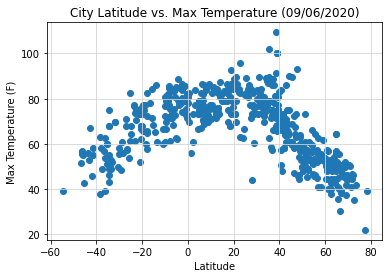

In [14]:
# create scattergraph for latitude and max temp
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Max Temperature (09/06/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()


## Latitude vs. Humidity Plot

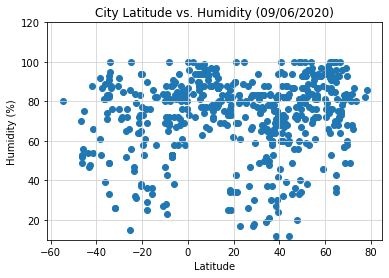

In [16]:
# create scattergraph for latitude and humidity
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Humidity (09/06/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(10, 120)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

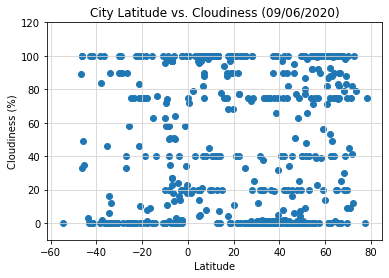

In [18]:
# create scattergraph for latitude and cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Cloudiness (09/06/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-10, 120)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

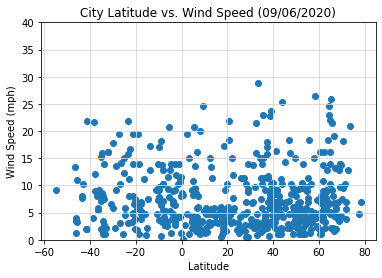

In [20]:
# create scattergraph for latitude and cloudiness
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.title("City Latitude vs. Wind Speed (09/06/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, 40)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


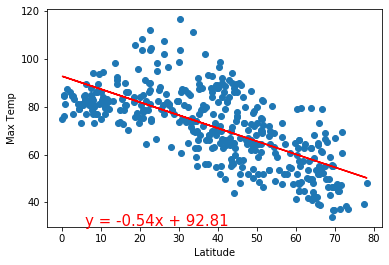

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


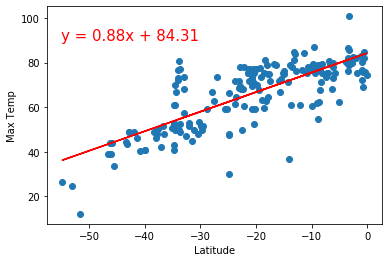

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


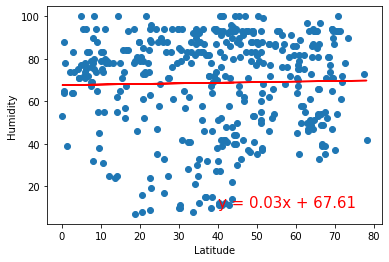

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


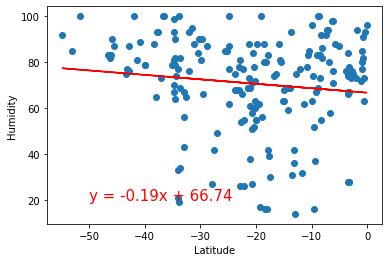

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


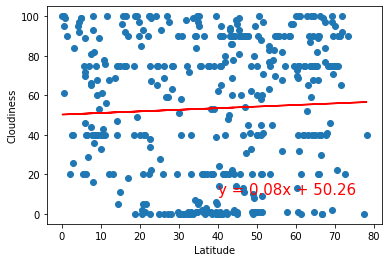

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


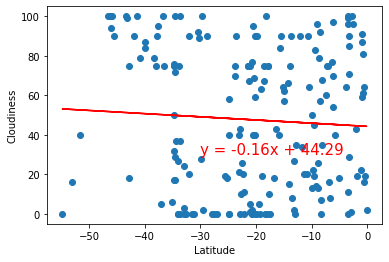

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


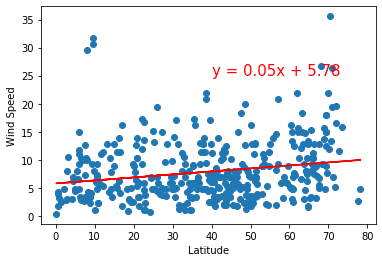

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


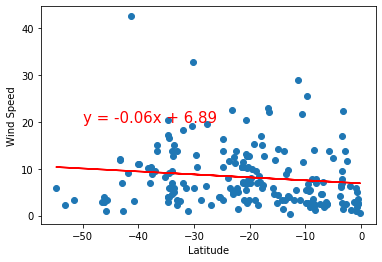